<a href="https://colab.research.google.com/github/pgordin/Grafy2022/blob/main/Cz%C4%99%C5%9B%C4%87_0_kilka_przyk%C5%82ad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drobne przykłady grafiki
Pierwszy wykres poniżej

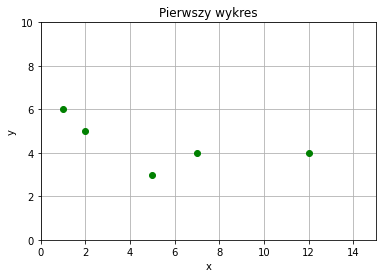

In [2]:
import matplotlib.pyplot as pplot
import numpy as np

"""
pierwszy wykres
"""

x = [1, 2, 5, 7, 12]
y = [6, 5, 3, 4, 4]

pplot.figure()
pplot.title("Pierwszy wykres")
pplot.xlabel("x")
pplot.ylabel("y")
pplot.plot(x, y, "go")
pplot.axis([0,15,0,10])
pplot.grid(True)

Drugi wykres w formie interaktywnej -- $sin(x)$ dla $x \in [0, 5 \pi]$. Google Colab nie obsługuje *%matplotlib notebook*.

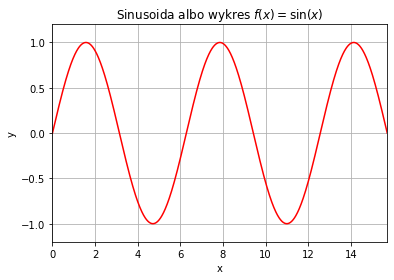

In [5]:
%matplotlib inline

x = [i/1000*np.pi*5 for i in range(0, 1001, 1)]
y = np.sin(x)

pplot.figure()
pplot.title("Sinusoida albo wykres $f(x) = \sin(x)$")
pplot.xlabel("x")
pplot.ylabel("y")
pplot.plot(x, y, "r-")
pplot.axis([0,5*np.pi,-1.2, 1.2])
pplot.grid(True)
pplot.show()

Trzeci wykres -- elementy statystyki, a zarazem trzecie podejście do wykresów

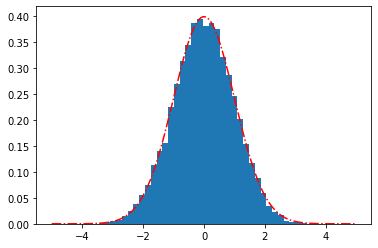

In [ ]:
%matplotlib inline

x = [-5 + 10 * i/1000 for i in range(0, 1000, 1)]
# tak można!
mu, sigma = 0, 1
probka = np.random.normal(mu, sigma, 10000)
pplot.figure()
pplot.hist(probka, bins=40, density=True)

# gęstość rozkładu normalnego - moja funkcja
def ndensity(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-mu)**2/2/sigma**2)

y = [ndensity(z, mu, sigma) for z in x]

pplot.plot(x, y, "r-.")
pplot.show()

Alternatywne, teoretycznie sybsze (w działaniu i pisaniu) rozwiązanie wykorzystujące siłę pakietu numpy.

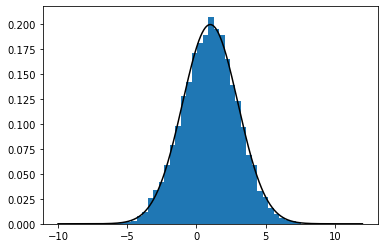

In [ ]:
mu, sigma = 1, 2
probka = np.random.normal(mu, sigma, 10000)
pplot.figure()
pplot.hist(probka, bins=40, density=True)

x = np.linspace(-10, 12, 1000)
y = ndensity(x, mu, sigma)

pplot.plot(x, y, "k-")
pplot.show()

## Drobny kawałek statystyki 
Ten python w sumie nieco R przypomina

In [7]:
%matplotlib inline

import pandas as pd
from statsmodels.formula.api import ols

dane = pd.read_excel(r'Raty.xlsx', 0)
print(dane[1:10])
print("-----------")
!ls
# !pip install nazwa_pakietu

   Dochody  Wiek  Wydatek Raty
1  1792.57    21   664.72    T
2  3069.06    21  1532.68    N
3  2522.90    22   860.52    N
4  1430.69    34   378.56    N
5  2586.68    54  1829.39    T
6  3371.59    55  1317.44    N
7  2118.70    38   799.27    T
8  2115.90    44   811.03    N
9  1170.18    45   680.50    T
-----------
Raty.xlsx  sample_data


In [8]:
#nowa kolumna
dane['RatyT'] = np.where(dane['Raty']=='T', 1, 0)
print(dane.head())

   Dochody  Wiek  Wydatek Raty  RatyT
0  3021.90    49   973.19    N      0
1  1792.57    21   664.72    T      1
2  3069.06    21  1532.68    N      0
3  2522.90    22   860.52    N      0
4  1430.69    34   378.56    N      0


In [9]:
model = ols("Wydatek ~ Dochody + RatyT", data = dane)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Wydatek   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     63.31
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.13e-19
Time:                        10:54:40   Log-Likelihood:                -917.55
No. Observations:                 127   AIC:                             1841.
Df Residuals:                     124   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.6702    135.354     -3.034      0.0

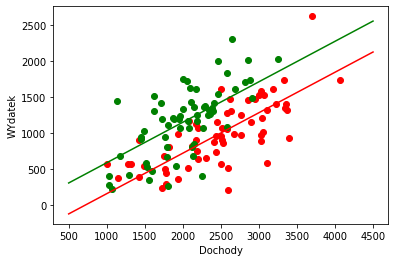

In [ ]:
daneT = dane[dane['Raty']=='T']
daneN = dane[dane['Raty']=='N']

# wykres dla predykcji
pplot.figure()
pplot.xlabel("Dochody")
pplot.ylabel("WYdatek")

dochT = np.array(daneT['Dochody'])
wydT = np.array(daneT['Wydatek'])
dochN = np.array(daneN['Dochody'])
wydN = np.array(daneN['Wydatek'])

pplot.plot(dochN, wydN, "ro", label = "RatyN")
pplot.plot(dochT, wydT, "go", label = "RatyT")

pred1 = results.predict(pd.DataFrame({'Dochody': [500, 4500], 'RatyT': [1, 1]}))
pred0 = results.predict(pd.DataFrame({'Dochody': [500, 4500], 'RatyT': [0, 0]}))

pplot.plot([500, 4500], pred0, "r-")
pplot.plot([500, 4500], pred1, "g-")
pplot.show()

In [ ]:
# Nadmiarowa kolumna
modelT = ols("Wydatek ~ Dochody + RatyT", data = daneT)
resultsT = modelT.fit()
print(resultsT.summary())

modelN = ols("Wydatek ~ Dochody + RatyT", data = daneN)
resultsN = modelN.fit()
print(resultsN.summary())

                            OLS Regression Results                            
Dep. Variable:                Wydatek   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     56.63
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.89e-10
Time:                        22:19:20   Log-Likelihood:                -457.86
No. Observations:                  63   AIC:                             919.7
Df Residuals:                      61   BIC:                             924.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -113.8594     94.883     -1.200      0.2

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
#teraz poprawnie
modelT = ols("Wydatek ~ Dochody", data = daneT)
resultsT = modelT.fit()
print(resultsT.summary())

modelN = ols("Wydatek ~ Dochody", data = daneN)
resultsN = modelN.fit()
print(resultsN.summary())

                            OLS Regression Results                            
Dep. Variable:                Wydatek   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     56.63
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.89e-10
Time:                        22:20:12   Log-Likelihood:                -457.86
No. Observations:                  63   AIC:                             919.7
Df Residuals:                      61   BIC:                             924.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.7188    189.766     -1.200      0.2

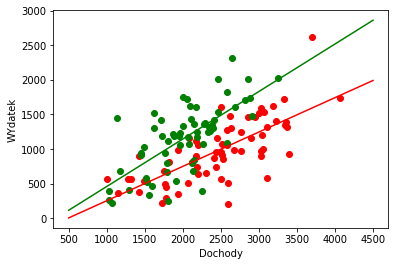

In [ ]:
# wykres dla predykcji
pplot.figure()
pplot.xlabel("Dochody")
pplot.ylabel("WYdatek")

pplot.plot(dochN, wydN, "ro", label = "RatyN")
pplot.plot(dochT, wydT, "go", label = "RatyT")

pred1 = resultsT.predict(pd.DataFrame({'Dochody': [500, 4500]}))
pred0 = resultsN.predict(pd.DataFrame({'Dochody': [500, 4500]}))

pplot.plot([500, 4500], pred0, "r-")
pplot.plot([500, 4500], pred1, "g-")
pplot.show()